#泰坦尼克号数据分析

导入必要的库

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

导入数据CSV文件

In [192]:
data = pd.read_csv("titanic-data.csv")

In [193]:
#展示数据格式

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##1、数据清理

In [194]:
#PassengerId、Name、Ticket、Fare 几个字段在分析中不会用到，做删除处理
#参考了 http://sofasofa.io/forum_main_post.php?postid=1000448
data = data.drop(["PassengerId", "Name", "Ticket", "Fare"], axis=1)

data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


##2、分析性别与生还率之间的关系

In [195]:
sex_with_survived = data.groupby("Sex")["Survived"].mean()

sex_with_survived

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

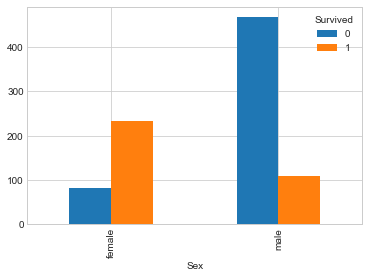

In [196]:
#绘制 存活于死亡的对比图
data.groupby(["Sex", "Survived"])["Survived"].count().unstack().plot(kind="bar")

##3、不同始发地生存率分析

In [197]:
group_by_sur_emb = data.groupby(["Embarked", "Survived"]).size()

group_by_sur_emb

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [198]:
#生存率统计
group_by_embarked = data.groupby("Embarked")["Survived"].mean()

group_by_embarked

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

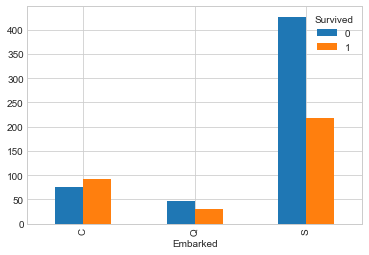

In [199]:
#绘制 各始发地的生存对比图
group_by_sur_emb.unstack().plot(kind="bar")

##4、分析是否有家庭与生还率的关系

In [200]:
#以 SibSp 和 Parch 来判断是否有家庭，有一个为真，则为有家庭存在
def is_family(row):
    return (row["SibSp"] > 0) ^ (row["Parch"] > 0)


data["Family"] = data.apply(is_family, axis=1)

data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Family
0,0,3,male,22.0,1,0,NaN,S,True
1,1,1,female,38.0,1,0,C85,C,True
2,1,3,female,26.0,0,0,NaN,S,False
3,1,1,female,35.0,1,0,C123,S,True
4,0,3,male,35.0,0,0,NaN,S,False


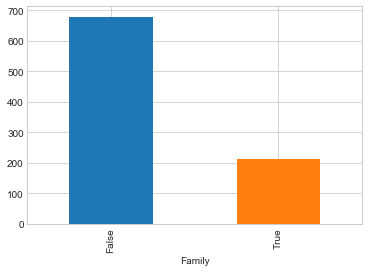

In [201]:
#拥有家庭和未拥有家庭的对比图
is_have_family = data.groupby("Family")

is_have_family.size().plot(kind="bar")

In [202]:
#计算家庭生存率
is_have_family["Survived"].mean()

Family
False    0.331370
True     0.551887
Name: Survived, dtype: float64

##5、分析生还率与年龄是否有关系


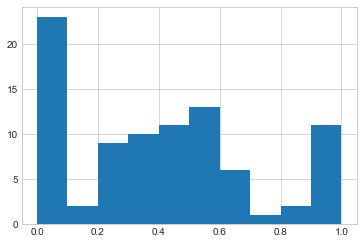

In [206]:
#先看看整体分布情况
survived_with_age = data.groupby("Age")["Survived"]
# survived_with_age.sum().hist(bins=10)
# survived_with_age.size().hist(bins=10)
survived_rate = survived_with_age.mean()
survived_rate.hist()